<a href="https://colab.research.google.com/github/sidhesh109/sidd.content/blob/main/gold_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [28]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data p.csv')

In [29]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01-02-2023,1447.160034,84.860001,78.470001,15.180,1.471692
1,01-03-2023,1447.160034,85.570000,78.370003,15.285,1.474491
2,01-04-2023,1411.630005,85.129997,77.309998,15.167,1.475492
3,01-07-2023,1416.180054,84.769997,75.500000,15.053,1.468299
4,01-08-2023,1390.189941,86.779999,76.059998,15.590,1.557099


In [30]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,05-08-2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,05-09-2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,05-10-2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [31]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [32]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [33]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [34]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.338485,122.732875,31.842221,20.084997,1.283654
std,519.127366,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [35]:
correlation = gold_data.corr()

<ipython-input-35-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

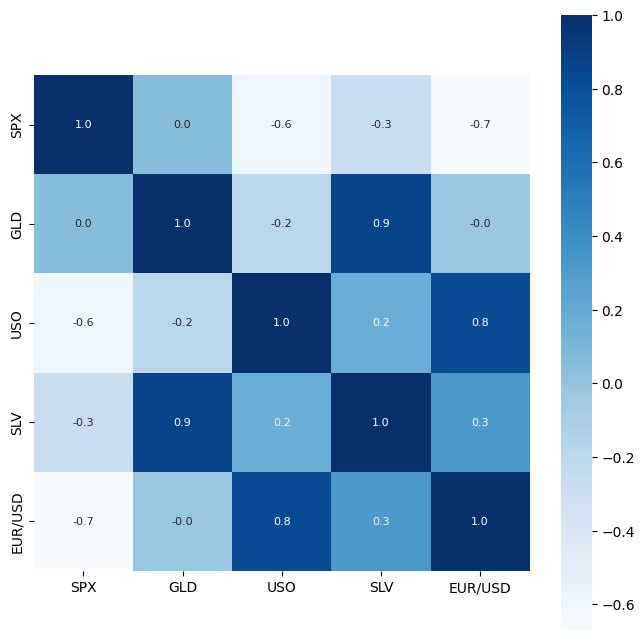

In [36]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [37]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049323
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-38-b94eac2e88dd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

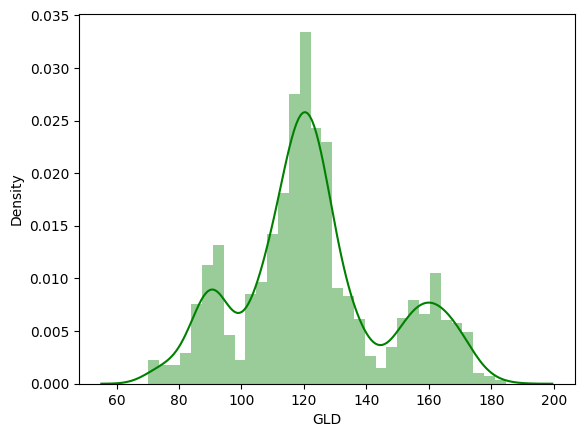

In [38]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [39]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [40]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [41]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training:Random Forest Regressor

In [43]:
regressor = RandomForestRegressor(n_estimators=100)

In [44]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [45]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [46]:
print(test_data_prediction)

[168.39949985  81.97299992 115.67180026 127.54840067 120.7964012
 154.67239776 150.33479868 126.13150008 117.50359881 125.88190069
 116.4566012  172.08710052 141.82349872 167.7069987  115.13369965
 117.68420064 138.67340302 170.0713003  159.60770243 157.6085997
 155.08130028 125.38910015 175.54499964 156.94800389 125.19690024
  93.75829989  76.68330031 120.78579996 119.1497998  167.51599958
  88.16990045 125.42860014  91.04530071 117.83560006 121.11879922
 135.96510125 115.76180108 115.22930086 147.65289967 106.8434012
 103.94040247  87.15039783 126.63710046 117.95180033 151.59359946
 119.54260038 108.55629981 108.01229789  93.2182006  127.18349759
  74.80810054 113.67649951 121.31630028 111.34749919 118.83049901
 120.31529947 159.60389977 167.76340119 147.35879727  85.91469871
  94.36310048  86.79819883  90.45510017 119.07780065 126.48340075
 127.66619975 169.38549953 122.24259905 117.1941991   98.42300035
 168.01480111 143.13759906 131.54480296 121.21440193 120.67029943
 119.84770063

In [47]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9895748901914632


Compare the Actual Values and Predicted Values in a Plot

In [48]:
Y_test = list(Y_test)

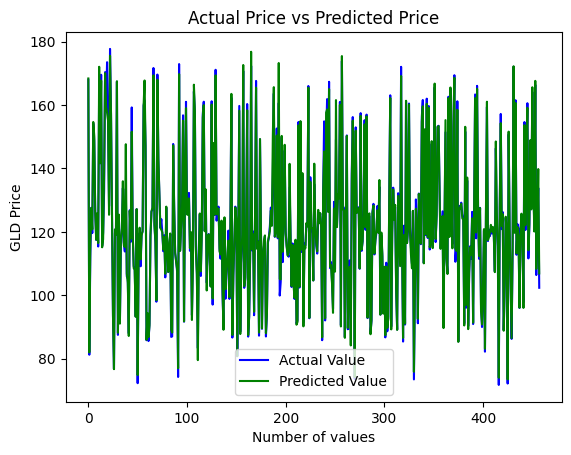

In [49]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()